<a href="https://colab.research.google.com/github/kebabee/Modelowanie-komputerowe/blob/main/two_dice_board_movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving on board with two random dices

The Monopoly-like board consists of 40 fields, the player starts on field number 1 and throws two cubic dice.
starts on field number 1 and throws two cubic dice in each step.
The value of the dice throw is calculated by the randint function from the random library.
Depending on the implementation, hitting field number 30 (go to jail) results in a move to field number 10 (jail).

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

def monopoly(N, prisonFlag):
    p = 0
    board = np.zeros(40)
    for _ in range(N):
        p += (rd.randint(1,6) + rd.randint(1,6))
        if p >= 40:
            p -= 40
        if prisonFlag:
            if p == 29:
                p = 9
        board[p] += 1/N
    plt.plot(np.linspace(1,40,40), board,'o',label=f'{N} rolls')

## No jail case

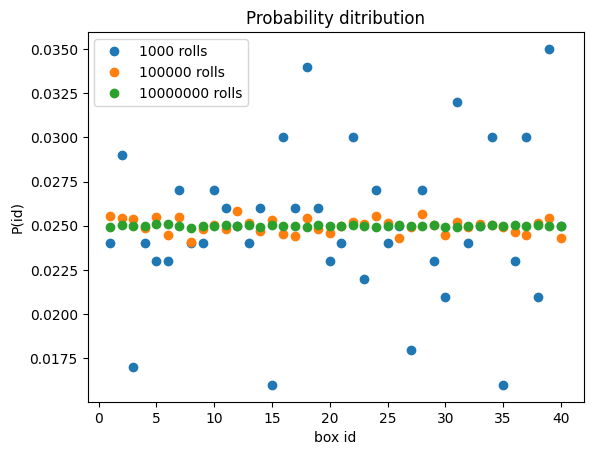

In [4]:
monopoly(1000, False)
monopoly(100000, False)
monopoly(10000000, False)

#plt.ylim(0,0.08)
plt.legend()
plt.title('Probability ditribution')
plt.xlabel('box id')
plt.ylabel('P(id)')
plt.show()

As the number of projections increases, the distribution looks more and more like a uniform distribution.

## Jail case

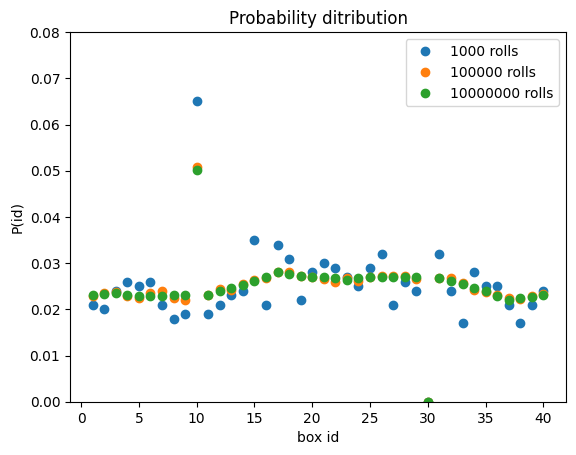

In [6]:
monopoly(1000, True)
monopoly(100000, True)
monopoly(10000000, True)

plt.ylim(0,0.08)
plt.legend()
plt.title('Probability ditribution')
plt.xlabel('box id')
plt.ylabel('P(id)')
plt.show()

Adding the field "go to jail" changes the form of the distribution. Due to the rules the probability of standing on the field number 30 is 0 and the field number 10 (jail) clearly stands out from the rest.

The rest of the graph no longer resembles a uniform distribution, the fields following "go to jail" show a clear decrease in probability. Some of the instances of appearing on these fields would follow throwing dice while standing on field number 30, these instances fall off and hence the drop.
This additional part of the throws goes to field number 10, hence the apparent increase in probability on the next fields.